In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# Initialiserer pen visning av uttrykkene
sp.init_printing()

# Plotteparametre for å få store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

In [2]:
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
mu0, I, R, N, l, x, z, a = sp.symbols('mu0 I R N l x z a')

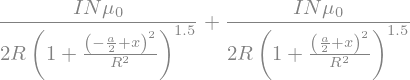

In [3]:
helmholtz = (N*mu0*I)/(2*R) * (1 + (x - a/2)**2/R**2)**(-3/2) + (N*mu0*I)/(2*R) * (1 + (x + a/2)**2/R**2)**(-3/2)
helmholtz

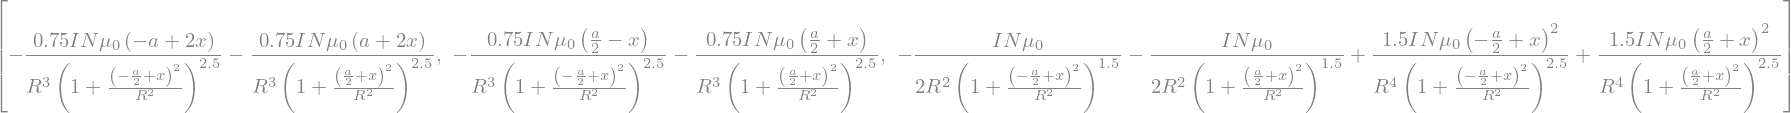

In [4]:
dBbd = [ sp.diff(helmholtz, x), sp.diff(helmholtz, a), sp.diff(helmholtz, R)]
dBbd

In [62]:
x0 = -0.6

In [68]:
from Helmholtzspoler import get_data
x1, y1 = np.array(get_data("data/helmholtzspoler/2R.csv"))
x2, y2 = np.array(get_data("data/helmholtzspoler/R_2.csv"))
x3, y3 = np.array(get_data("data/helmholtzspoler/R.csv"))
x1, x2, x3 = x1-x0, x2-x0, x3-x0

In [69]:
x_vals_1 = np.linspace(x1[0], x1[-1], len(x1))
x_vals_2 = np.linspace(x2[0], x2[-1], len(x2))
x_vals_3 = np.linspace(x3[0], x3[-1], len(x3))

Be1 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.14), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_1]
Be2 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.035), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_2]
Be3 = [helmholtz.subs([(N, 330), (I, 1), (a, 0.07), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4 for xbi in x_vals_3]

Be1 = np.array(Be1).astype(np.float64)
Be2 = np.array(Be2).astype(np.float64)
Be3 = np.array(Be3).astype(np.float64)

$$
\Delta B_\mathrm{b} = \sqrt{\left(\frac{\partial B_\mathrm{b}}{\partial x_\mathrm{b}} \cdot \Delta x\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial I} \cdot \Delta R\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial R} \cdot \Delta a\right)^2}.
$$

## Find standard deviation

In [55]:
import statistics

data = np.loadtxt("data/10sek_stdev.csv", delimiter=",", encoding="utf-8-sig")
y_vals = data[:, 1]/100 # data is 100x
stdev = statistics.stdev(y_vals)
stdev

In [80]:
dx = 0.02 # [m] kan være en del feil her
dR = 0.001 # [m] oppgitt størelse, så vi må stole på at vi har høy presisjon
da = 0.01 # [m] vi greide å lage ganske bra presisjon

deltas = [dx, dR, da]
dy = stdev*7e5 # the standard deviation is too small, maybe we did something wrong?

deltaBb1 = np.zeros(x_vals_1.shape)
deltaBb2 = np.zeros(x_vals_2.shape)
deltaBb3 = np.zeros(x_vals_3.shape)

for i in range(len(x_vals_1)):
    deltaBb1[i] = np.sum([(dBbd[j].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07), (a, 0.14),
                                        (x, x_vals_1[i])])*deltas[j])**2 for j in range(len(deltas))])
    # Så tar vi roten og gjør om fra Tesla til Gauss
    deltaBb1[i] = np.sqrt(deltaBb1[i])*1e4
for i in range(len(x_vals_2)):
    deltaBb2[i] = np.sum([(dBbd[j].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07), (a, 0.035),
                                        (x, x_vals_2[i])])*deltas[j])**2 for j in range(len(deltas))])
    # Så tar vi roten og gjør om fra Tesla til Gauss
    deltaBb2[i] = np.sqrt(deltaBb2[i])*1e4
for i in range(len(x_vals_3)):
    deltaBb3[i] = np.sum([(dBbd[j].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07), (a, 0.07),
                                        (x, x_vals_3[i])])*deltas[j])**2 for j in range(len(deltas))])
    # Så tar vi roten og gjør om fra Tesla til Gauss
    deltaBb3[i] = np.sqrt(deltaBb3[i])*1e4

## Graph 1, a = 0.14 m

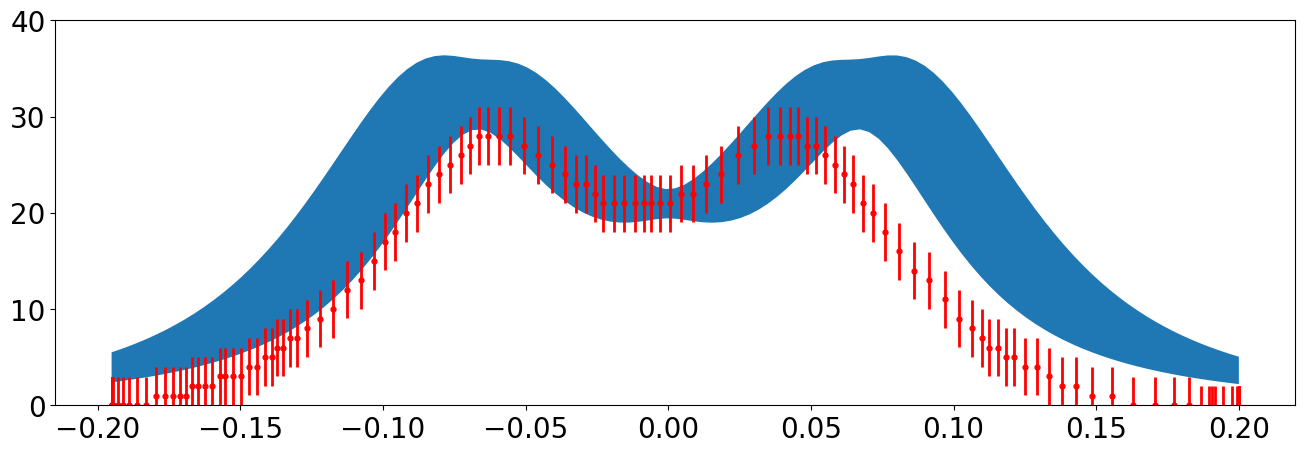

In [81]:
plt.fill_between(x_vals_1, Be1 - deltaBb1, Be1 + deltaBb1)
plt.errorbar(x1, y1, fmt="r.", yerr=dy)
plt.ylim([0, 1.1*np.max(Be1 + deltaBb1)])
plt.show()

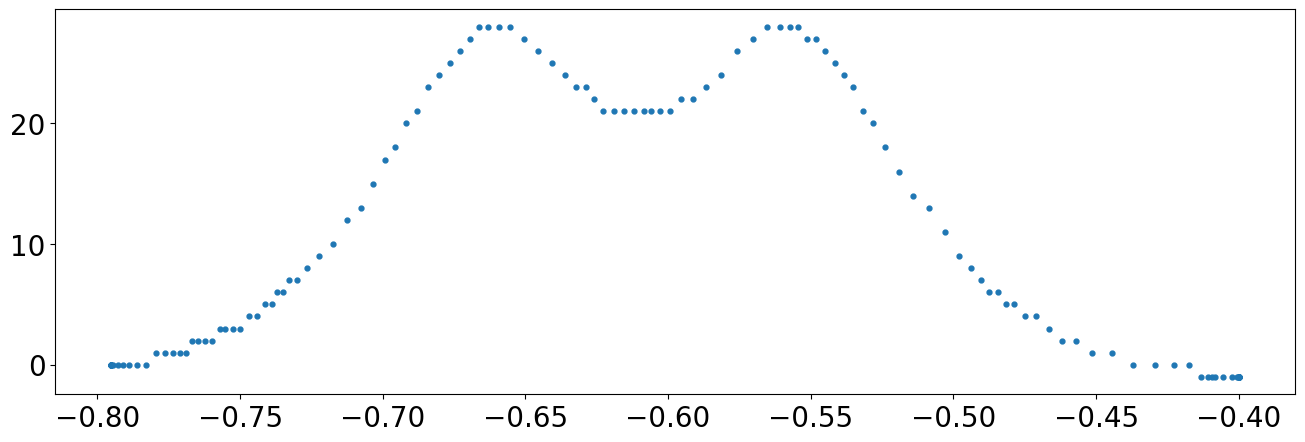

In [53]:
plt.plot(x1, y1, ".")
plt.show()